In [640]:
import pandas as pd


def combine_csv(demographics_file, performance_file, prevloans_file):
  # Read the CSV files
  demographics_df = pd.read_csv(demographics_file)
  performance_df = pd.read_csv(performance_file)
  prevloans_df = pd.read_csv(prevloans_file)

  # Merge demographics and performance data
  merged_df = pd.merge(demographics_df, performance_df, on='customerid', suffixes=('_current', '_previous'), how='left')

  # Merge the merged DataFrame with previous loans data
  merged_df = pd.merge(merged_df, prevloans_df, on='customerid', suffixes=('_current', '_previous'), how='left')

  # Return the merged DataFrame
  return merged_df




demographics_file = '/content/traindemographics.csv'
performance_file = '/content/trainperf (1).csv'
prevloans_file = '/content/trainprevloans.csv'


# Combine the data
combined_data = combine_csv(demographics_file, performance_file, prevloans_file)


# Print the first few rows of the combined data
print(combined_data.head())

                         customerid                   birthdate  \
0  8a858e135cb22031015cbafc76964ebd  1973-10-10 00:00:00.000000   
1  8a858e275c7ea5ec015c82482d7c3996  1986-01-21 00:00:00.000000   
2  8a858e5b5bd99460015bdc95cd485634  1987-04-01 00:00:00.000000   
3  8a858e5b5bd99460015bdc95cd485634  1987-04-01 00:00:00.000000   
4  8a858e5b5bd99460015bdc95cd485634  1987-04-01 00:00:00.000000   

  bank_account_type  longitude_gps  latitude_gps bank_name_clients  \
0           Savings       3.319219      6.528604           GT Bank   
1           Savings       3.325598      7.119403     Sterling Bank   
2           Savings       5.746100      5.563174     Fidelity Bank   
3           Savings       5.746100      5.563174     Fidelity Bank   
4           Savings       5.746100      5.563174     Fidelity Bank   

  bank_branch_clients employment_status_clients level_of_education_clients  \
0                 NaN                       NaN                        NaN   
1                 Na

In [641]:
print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14767 entries, 0 to 14766
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  14767 non-null  object 
 1   birthdate                   14767 non-null  object 
 2   bank_account_type           14767 non-null  object 
 3   longitude_gps               14767 non-null  float64
 4   latitude_gps                14767 non-null  float64
 5   bank_name_clients           14767 non-null  object 
 6   bank_branch_clients         125 non-null    object 
 7   employment_status_clients   13249 non-null  object 
 8   level_of_education_clients  3611 non-null   object 
 9   systemloanid_current        13698 non-null  float64
 10  loannumber_current          13698 non-null  float64
 11  approveddate_current        13698 non-null  object 
 12  creationdate_current        13698 non-null  object 
 13  loanamount_current          136

In [642]:
import pandas as pd
# Convert date columns to datetime format
date_columns = ['birthdate', 'approveddate_current', 'creationdate_current', 'approveddate_previous',
                'creationdate_previous', 'closeddate', 'firstduedate', 'firstrepaiddate']
combined_data[date_columns] = combined_data[date_columns].apply(pd.to_datetime)

# Convert categorical columns to categorical data type
categorical_columns = ['customerid','bank_account_type', 'bank_name_clients', 'bank_branch_clients',
                       'employment_status_clients', 'level_of_education_clients', 'good_bad_flag','referredby_current','referredby_previous']
combined_data[categorical_columns] = combined_data[categorical_columns].astype('category')

# Ensure numerical columns are represented in the appropriate data type
numerical_columns = ['longitude_gps', 'latitude_gps', 'systemloanid_current', 'loannumber_current',
                     'loanamount_current', 'totaldue_current', 'termdays_current', 'systemloanid_previous',
                     'loannumber_previous', 'loanamount_previous', 'totaldue_previous', 'termdays_previous']
combined_data[numerical_columns] = combined_data[numerical_columns].astype(float)

# Ensure systemloanid_previous, loannumber_previous, and other relevant columns are integers
combined_data['systemloanid_previous'] = combined_data['systemloanid_previous'].astype('Int64')
combined_data['loannumber_previous'] = combined_data['loannumber_previous'].astype('Int64')


# Check the data types after conversion
print(combined_data.dtypes)


customerid                          category
birthdate                     datetime64[ns]
bank_account_type                   category
longitude_gps                        float64
latitude_gps                         float64
bank_name_clients                   category
bank_branch_clients                 category
employment_status_clients           category
level_of_education_clients          category
systemloanid_current                 float64
loannumber_current                   float64
approveddate_current          datetime64[ns]
creationdate_current          datetime64[ns]
loanamount_current                   float64
totaldue_current                     float64
termdays_current                     float64
referredby_current                  category
good_bad_flag                       category
systemloanid_previous                  Int64
loannumber_previous                    Int64
approveddate_previous         datetime64[ns]
creationdate_previous         datetime64[ns]
loanamount

In [643]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
combined_data['bank_account_type'] = label_encoder.fit_transform(combined_data['bank_account_type'])
combined_data['bank_name_clients'] = label_encoder.fit_transform(combined_data['bank_name_clients'])
combined_data['bank_branch_clients'] = label_encoder.fit_transform(combined_data['bank_branch_clients'])
combined_data['employment_status_clients'] = label_encoder.fit_transform(combined_data['employment_status_clients'])
combined_data['level_of_education_clients'] = label_encoder.fit_transform(combined_data['level_of_education_clients'])
combined_data['good_bad_flag'] = label_encoder.fit_transform(combined_data['good_bad_flag'])
combined_data['customerid'] = label_encoder.fit_transform(combined_data['customerid'])
combined_data['referredby_current'] = label_encoder.fit_transform(combined_data['referredby_current'])
combined_data['systemloanid_previous'] = label_encoder.fit_transform(combined_data['systemloanid_previous'])
combined_data['referredby_previous'] = label_encoder.fit_transform(combined_data['referredby_previous'])

# Convert datetime variables to numerical representations (e.g., Unix timestamps)
combined_data['birthdate'] = combined_data['birthdate'].astype(int) / 10**9  # Convert to Unix timestamp
combined_data['approveddate_current'] = combined_data['approveddate_current'].astype(int) / 10**9
combined_data['creationdate_current'] = combined_data['creationdate_current'].astype(int) / 10**9
combined_data['approveddate_previous'] = combined_data['approveddate_previous'].astype(int) / 10**9
combined_data['creationdate_previous'] = combined_data['creationdate_previous'].astype(int) / 10**9
combined_data['closeddate'] = combined_data['closeddate'].astype(int) / 10**9
combined_data['firstduedate'] = combined_data['firstduedate'].astype(int) / 10**9
combined_data['firstrepaiddate'] = combined_data['firstrepaiddate'].astype(int) / 10**9

# Check the updated data types
print(combined_data.dtypes)


customerid                      int64
birthdate                     float64
bank_account_type               int64
longitude_gps                 float64
latitude_gps                  float64
bank_name_clients               int64
bank_branch_clients             int64
employment_status_clients       int64
level_of_education_clients      int64
systemloanid_current          float64
loannumber_current            float64
approveddate_current          float64
creationdate_current          float64
loanamount_current            float64
totaldue_current              float64
termdays_current              float64
referredby_current              int64
good_bad_flag                   int64
systemloanid_previous           int64
loannumber_previous             Int64
approveddate_previous         float64
creationdate_previous         float64
loanamount_previous           float64
totaldue_previous             float64
termdays_previous             float64
closeddate                    float64
referredby_p

In [644]:
print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14767 entries, 0 to 14766
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  14767 non-null  int64  
 1   birthdate                   14767 non-null  float64
 2   bank_account_type           14767 non-null  int64  
 3   longitude_gps               14767 non-null  float64
 4   latitude_gps                14767 non-null  float64
 5   bank_name_clients           14767 non-null  int64  
 6   bank_branch_clients         14767 non-null  int64  
 7   employment_status_clients   14767 non-null  int64  
 8   level_of_education_clients  14767 non-null  int64  
 9   systemloanid_current        13698 non-null  float64
 10  loannumber_current          13698 non-null  float64
 11  approveddate_current        14767 non-null  float64
 12  creationdate_current        14767 non-null  float64
 13  loanamount_current          136

In [645]:
from sklearn.impute import SimpleImputer

# Define imputers for numerical and categorical features
numerical_imputer = SimpleImputer(strategy='median')  # Impute missing numerical values with median
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Impute missing categorical values with most frequent

# Separate numerical, categorical, and datetime features
numerical_features = combined_data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = combined_data.select_dtypes(include=['category']).columns
datetime_features = combined_data.select_dtypes(include=['datetime64']).columns

# Impute missing values for numerical features
combined_data[numerical_features] = numerical_imputer.fit_transform(combined_data[numerical_features])

print(combined_data[categorical_features].isnull().sum())


# Impute missing values for datetime features (using forward-fill)
combined_data[datetime_features] = combined_data[datetime_features].ffill()

# Check for any remaining missing values
print(combined_data.isnull().sum())


Series([], dtype: float64)
customerid                    0
birthdate                     0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
bank_branch_clients           0
employment_status_clients     0
level_of_education_clients    0
systemloanid_current          0
loannumber_current            0
approveddate_current          0
creationdate_current          0
loanamount_current            0
totaldue_current              0
termdays_current              0
referredby_current            0
good_bad_flag                 0
systemloanid_previous         0
loannumber_previous           0
approveddate_previous         0
creationdate_previous         0
loanamount_previous           0
totaldue_previous             0
termdays_previous             0
closeddate                    0
referredby_previous           0
firstduedate                  0
firstrepaiddate               0
dtype: int64


In [646]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data into features and target variable
X = combined_data.drop(columns=['good_bad_flag'])
y = combined_data['good_bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model before handling outliers
model_before = RandomForestClassifier()
model_before.fit(X_train, y_train)
y_pred_before = model_before.predict(X_test)
accuracy_before = accuracy_score(y_test, y_pred_before)
print("Accuracy before handling outliers:", accuracy_before)


Accuracy before handling outliers: 0.9570074475287745


In [647]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [648]:
# Select numerical columns for outlier detection
numerical_columns = combined_data.select_dtypes(include=['float64', 'int64']).columns

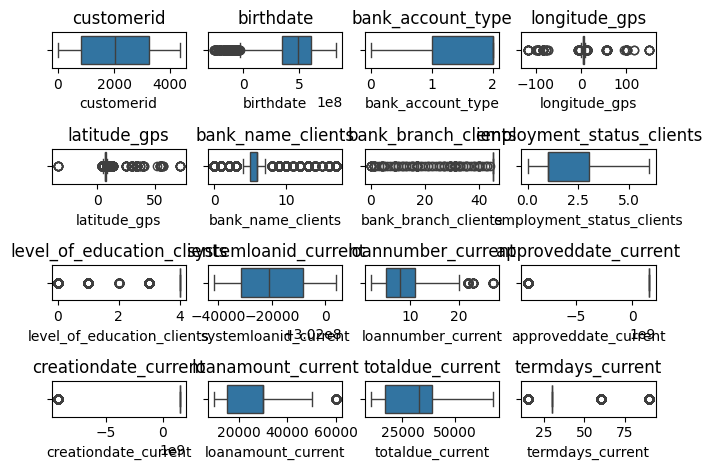

In [649]:
# Visual inspection: box plots for numerical columns
# plt.figure(figsize=(15, 10))
for i in range(1, min(len(numerical_columns) + 1, 17)):
    plt.subplot(4, 4, i)
    sns.boxplot(x=combined_data[numerical_columns[i-1]])
    plt.title(numerical_columns[i-1])
plt.tight_layout()
plt.show()

In [650]:
# Statistical methods: identify outliers based on IQR
outlier_indices = []
for column in numerical_columns:
    Q1 =combined_data[column].quantile(0.25)
    Q3 = combined_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = combined_data[(combined_data[column] < lower_bound) | (combined_data[column] > upper_bound)]
    outlier_indices.extend(outliers.index)


In [651]:
# Capture  outlier indices
outlier_indices = list(set(outlier_indices))

In [652]:
# Handle outliers
def average_outliers(df, outlier_indices):
  # Group outliers by their values
  outlier_groups = {}
  for i in outlier_indices:
    value = df.iloc[i][0]
    if value not in outlier_groups:
      outlier_groups[value] = []
    outlier_groups[value].append(i)

  # Calculate the average for each group of outliers
  for value, indices in outlier_groups.items():
    average = sum(df.iloc[i] for i in indices) / len(indices)
    for i in indices:
      df.iloc[i] = average

  return df

df_cleaned = average_outliers(combined_data, outlier_indices)

In [653]:
# Check the shape of the cleaned dataset
print("Shape of the cleaned dataset:", df_cleaned.shape)

Shape of the cleaned dataset: (14767, 29)


In [654]:
# Split data into features and target variable
X = df_cleaned.drop(columns=['good_bad_flag'])
y = df_cleaned['good_bad_flag']

In [655]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [656]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [657]:
model_after = RandomForestClassifier()
model_after.fit(X_train_scaled, y_train)
y_pred_after = model_after.predict(X_test_scaled)
accuracy_after = accuracy_score(y_test, y_pred_after)


In [658]:
print("Accuracy before handling missing values:", accuracy_before)
print("Accuracy after handling missing values and outliers:", accuracy_after)

Accuracy before handling missing values: 0.9570074475287745
Accuracy after handling missing values and outliers: 0.9747235387045814


In [659]:
# Check for data leakage by ensuring that there's no overlap between training and testing indices
train_indices = set(X_train.index)
test_indices = set(X_test.index)
intersection = train_indices.intersection(test_indices)
if intersection:
    print("Data leakage detected! Overlapping indices between training and testing data.")
else:
    print("No data leakage detected.")

No data leakage detected.


Class distribution:
good_bad_flag
1.0    11168
0.0     2530
2.0     1069
Name: count, dtype: int64


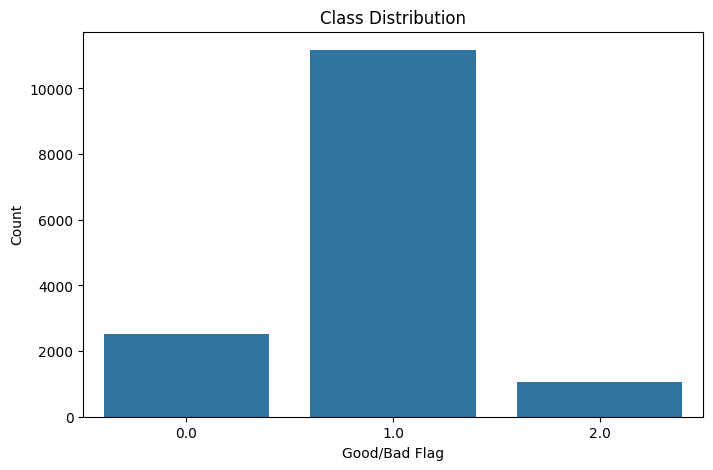

In [660]:
# Check class distribution of the target variable
class_distribution = df_cleaned['good_bad_flag'].value_counts()
print("Class distribution:")
print(class_distribution)

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='good_bad_flag', data=df_cleaned)
plt.title('Class Distribution')
plt.xlabel('Good/Bad Flag')
plt.ylabel('Count')
plt.show()

In [661]:
y_pred_after = y_pred_after.reshape(-1, 1)

In [662]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Calculate precision
precision = precision_score(y_test, y_pred_after,average='micro')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred_after, average='micro')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_after, average='micro')
print("F1-score:", f1)



Precision: 0.9747235387045814
Recall: 0.9747235387045814
F1-score: 0.9747235387045814


In [663]:
y_pred_after = model_after.predict_proba(X_test_scaled)

In [664]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred_after,multi_class='ovr')
print("AUC:", auc)

AUC: 0.9959621005422091


In [665]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize and train the Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_lr = model_lr.predict(X_test_scaled)
print("Classification report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

Classification report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       1.00      0.00      0.01       792
         1.0       0.81      1.00      0.89      3317
         2.0       1.00      1.00      1.00       322

    accuracy                           0.82      4431
   macro avg       0.94      0.67      0.63      4431
weighted avg       0.86      0.82      0.74      4431



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [666]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred_lr, average='micro')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred_lr, average='micro')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_lr, average='micro')
print("F1-score:", f1)



Accuracy: 0.8219363574813812
Precision: 0.8219363574813812
Recall: 0.8219363574813812
F1-score: 0.8219363574813812


In [667]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Epoch 1/10
259/259 [==============================] - 2s 6ms/step - loss: -15.4926 - accuracy: 0.7444 - val_loss: -65.9495 - val_accuracy: 0.7427
Epoch 2/10
259/259 [==============================] - 1s 5ms/step - loss: -277.7075 - accuracy: 0.7246 - val_loss: -595.6304 - val_accuracy: 0.7321
Epoch 3/10
259/259 [==============================] - 2s 7ms/step - loss: -1221.3179 - accuracy: 0.7206 - val_loss: -2003.0739 - val_accuracy: 0.7258
Epoch 4/10
259/259 [==============================] - 1s 5ms/step - loss: -3310.0264 - accuracy: 0.7215 - val_loss: -4734.6611 - val_accuracy: 0.7258
Epoch 5/10
259/259 [==============================] - 1s 5ms/step - loss: -6769.8081 - accuracy: 0.7137 - val_loss: -8862.5322 - val_accuracy: 0.7089
Epoch 6/10
259/259 [==============================] - 1s 4ms/step - loss: -11806.4521 - accuracy: 0.7179 - val_loss: -14709.8887 - val_accuracy: 0.6456
Epoch 7/10
259/259 [==============================] - 1s 4ms/step - loss: -18598.7852 - accuracy: 0.7192

In [668]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the SVM model
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


In [669]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='micro')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='micro')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='micro')
print("F1-score:", f1)



Accuracy: 0.8309636650868878
Precision: 0.8309636650868878
Recall: 0.8309636650868878
F1-score: 0.8309636650868879
